In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
# Load your data (Fake and True)
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
# Add a 'class' column to indicate fake (0) and true (1)
data_fake["class"] = 0
data_true["class"] = 1

In [4]:
# Select the last 10 rows for manual testing
data_fake_manual_testing = data_fake.tail(10)
data_true_manual_testing = data_true.tail(10)

In [5]:
# Remove the selected manual testing rows from the datasets
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis=0, inplace=True)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)

In [6]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
data_true.shape

(21407, 5)

In [9]:
data_fake.shape

(23471, 5)

In [10]:
# Set the 'class' column for manual testing data
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\HP\AppData\Local\Temp\ipykernel_5272\1793345259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_5272\1793345259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [11]:
# Concatenate the data into a single DataFrame
data_merge = pd.concat([data_fake, data_true], axis=0)

In [12]:
# Drop unnecessary columns
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

In [13]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [14]:
# Check for and handle missing values
data.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
# Shuffle the data
data = data.sample(frac=1)

In [16]:
data.head()

,text,class
11518,"WITH THESE LOSER DEMOCRATS IT S ALWAYS RUSSIA,...",0
7084,While I m not totally immune to clickbait as a...,0
17686,Thank God a hero with a gun emerged in Sutherl...,0
2333,WASHINGTON/NEW YORK (Reuters) - After a crackd...,1
11353,MOSCOW (Reuters) - Russia is ready to act as a...,1


In [17]:
# Reset the index
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [18]:
data.head()

,text,class
0,"WITH THESE LOSER DEMOCRATS IT S ALWAYS RUSSIA,...",0
1,While I m not totally immune to clickbait as a...,0
2,Thank God a hero with a gun emerged in Sutherl...,0
3,WASHINGTON/NEW YORK (Reuters) - After a crackd...,1
4,MOSCOW (Reuters) - Russia is ready to act as a...,1


In [19]:
# Define a function for text cleaning and formatting
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\n', ' ', text)
    return text

In [20]:
# Apply text cleaning to your data
data['text'] = data['text'].apply(clean_text)

In [21]:
# Split the data into features (X) and target (y)
X = data['text']
y = data['class']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [26]:
y_pred = logistic_regression.predict(X_test_tfidf)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9871657754010695


In [30]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5780
           1       0.98      0.99      0.99      5440

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [31]:
from sklearn.metrics import confusion_matrix

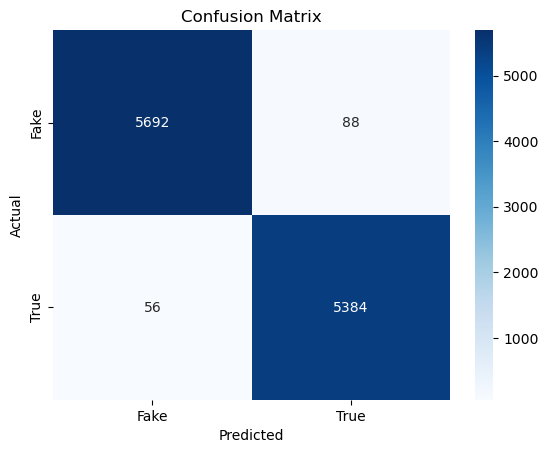

In [32]:
# Plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [34]:
# Predict the target values on the test data
y_pred_dt = decision_tree.predict(X_test_tfidf)

In [35]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.9959001782531194


In [36]:
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5780
           1       1.00      0.99      1.00      5440

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



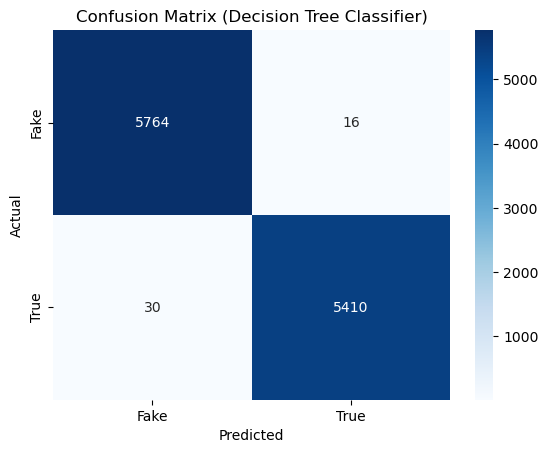

In [37]:
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(confusion_mat_dt, annot=True, cmap="Blues", fmt="d", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()

In [38]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [39]:
y_pred_gb = gradient_boosting.predict(X_test_tfidf)

Accuracy: 0.9957219251336898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5780
           1       0.99      1.00      1.00      5440

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



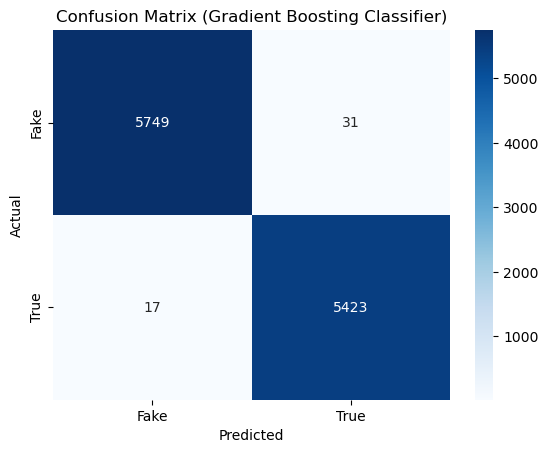

In [40]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

# Generate a classification report
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", classification_rep_gb)

# Plot a confusion matrix
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(confusion_mat_gb, annot=True, cmap="Blues", fmt="d", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()

In [41]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [42]:
# Predict the target values on the test data
y_pred_rf = random_forest.predict(X_test_tfidf)

Accuracy: 0.9868983957219252
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5780
           1       0.99      0.98      0.99      5440

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



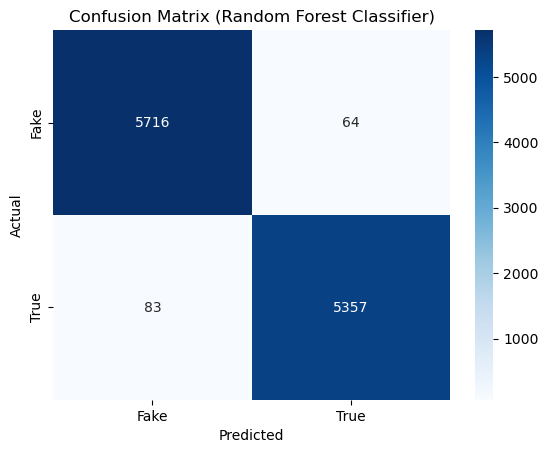

In [43]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep_rf)

# Plot a confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_mat_rf, annot=True, cmap="Blues", fmt="d", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()


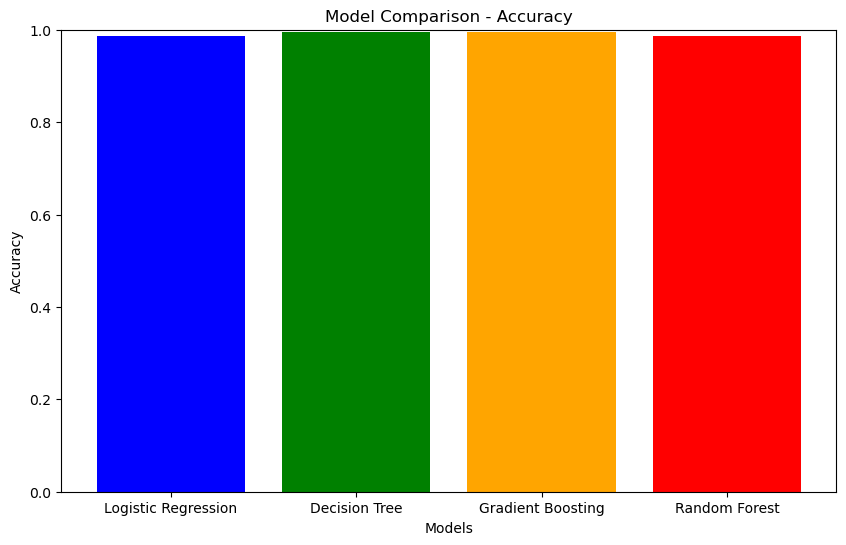

In [44]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy_values = [accuracy, accuracy_dt, accuracy_gb, accuracy_rf]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.0, 1.0) 
plt.show()

In [45]:
# Function for manual testing
def manual_testing(news, model):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test['text'].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    prediction = model.predict(new_xv_test)[0]
    
    label = "Fake News" if prediction == 0 else "Not A Fake News"
    print(f"Decision Tree Prediction: {label}")

news = str(input("Enter a news article for manual testing: "))

manual_testing(news, decision_tree)


Enter a news article for manual testing: UNITED NATIONS (Reuters) - Top United Nations officials warned the Security Council on Monday that its sanctions on North Korea over the country s nuclear and missile programs may be harming the delivery of humanitarian aid to the impoverished, isolated Asian state.  The 15-member Security Council held its fourth annual meeting on human rights abuses in North Korea, despite objections by China, who said it was not the right forum and warned the move could further escalate tensions in the region. U.N. human rights chief Zeid Ra ad al-Hussein said U.N. agencies and aid groups were  literally a life-line  for some 13 million vulnerable North Koreans,  but sanctions may be adversely affecting this essential help.  Zeid and deputy U.N. political affairs chief Miroslav Jenca said aid groups were facing difficulties accessing international banking channels, transporting goods into the North Korea, and rising fuel prices hindering delivery of aid. In an

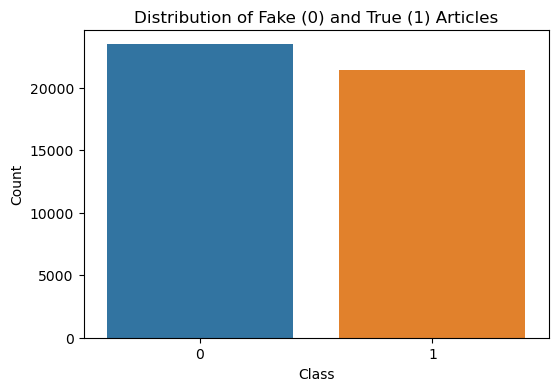

In [46]:
# Countplot to visualize the distribution of 'class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class')
plt.title('Distribution of Fake (0) and True (1) Articles')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()